In [1]:
!python3 -m pip install -r requirements.txt --break-system-packages

Import required packages

In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets

In [3]:
# Read in training, testing, and "new site" data sets
# make sure you have the data in the same directory as the notebook
train = pd.read_csv("SITE-DATA-TRAIN.csv")
test = pd.read_csv("SITE-DATA-TEST.csv")
new = pd.read_csv("SITE-DATA-48-STORES-UNDER-CONST.csv")

In [4]:
# Original model:
original_variables = ['AGINC', 'SQFT', 'COM60', 'COLGRAD']
original_model = sm.OLS(train['ANNUAL PROFIT'], sm.add_constant(train[original_variables]))
original_result = original_model.fit()
print(original_result.summary())

                            OLS Regression Results                            
Dep. Variable:          ANNUAL PROFIT   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     339.1
Date:                Wed, 03 Apr 2024   Prob (F-statistic):          3.73e-122
Time:                        21:24:30   Log-Likelihood:                -5107.5
No. Observations:                 374   AIC:                         1.022e+04
Df Residuals:                     369   BIC:                         1.024e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        8.36e+04   4.11e+04      2.035      0.0

In [5]:
# Original model R^2 (training set and testing set):
original_baseline = train['ANNUAL PROFIT'].mean()
original_train_prediction = original_result.predict(sm.add_constant(train[['AGINC', 'SQFT', 'COM60', 'COLGRAD']]))
original_test_prediction = original_result.predict(sm.add_constant(test[['AGINC', 'SQFT', 'COM60', 'COLGRAD']]))
training_R2 = 1 - ((original_train_prediction - train['ANNUAL PROFIT'])**2).sum() / ((original_baseline - train['ANNUAL PROFIT'])**2).sum()
testing_R2 = 1 - ((original_test_prediction - test['ANNUAL.PROFIT'])**2).sum() / ((original_baseline - test['ANNUAL.PROFIT'])**2).sum()

print(training_R2)
print(testing_R2)

0.7861430645543487
0.7201434330134763


In [6]:
# Original profit prediction:
original_profit = original_result.predict(sm.add_constant(new[['AGINC', 'SQFT', 'COM60', 'COLGRAD']])).sum()

print(original_profit)

40016174.42509794


## New Model

In [7]:
#Remove the "State" column since no numerical value

train2 = train.drop('STATE', axis=1).drop('STORENUM', axis=1)

#Create a correlation table

corr = train2.corr()
print(corr)

               ANNUAL PROFIT       LCI  NEARCOMP   NEARMIL  FREESTAND  \
ANNUAL PROFIT       1.000000 -0.407641  0.038363  0.260600   0.485003   
LCI                -0.407641  1.000000  0.071425 -0.114763  -0.219530   
NEARCOMP            0.038363  0.071425  1.000000 -0.110449   0.104221   
NEARMIL             0.260600 -0.114763 -0.110449  1.000000   0.211365   
FREESTAND           0.485003 -0.219530  0.104221  0.211365   1.000000   
GINI                0.095546 -0.104897  0.112272 -0.012172   0.020250   
HOUSEMED            0.374731 -0.151980 -0.174588  0.031857  -0.011140   
SQFT                0.579068 -0.299658 -0.074148  0.121758   0.150469   
INTERSECT          -0.018760  0.009492  0.016074 -0.092654  -0.002053   
POP                 0.659616 -0.272637  0.054076  0.222432   0.312887   
AGEMED             -0.014216 -0.025518 -0.188854  0.016974  -0.224206   
NONCITZN            0.161261 -0.059341  0.233885  0.085508   0.261204   
AGINC               0.868277 -0.314832 -0.147581  0

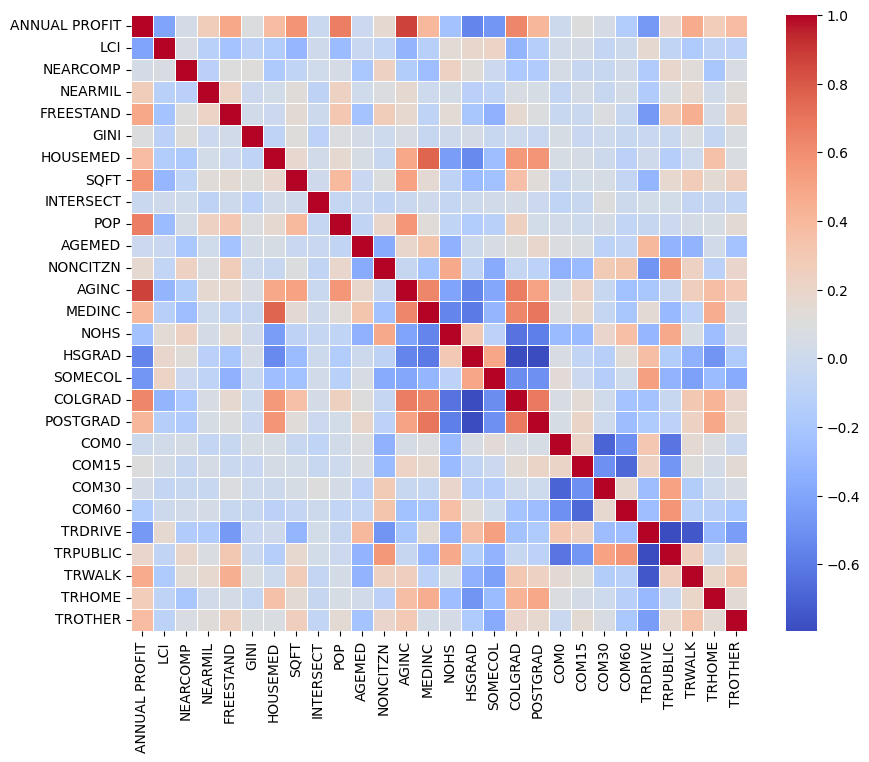

In [8]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=False, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)

# Show the plot
plt.show()

In [9]:
data = train2.columns.to_list()[1:]
checkboxes = [widgets.Checkbox(value=True, description=label) for label in data]
output = widgets.VBox(children=checkboxes)
display(output)

In [12]:
your_variables = []
for i in range(0, len(checkboxes)):
    if checkboxes[i].value == True:
        your_variables = your_variables + [checkboxes[i].description]
print(your_variables)

['LCI', 'NEARCOMP', 'NEARMIL', 'FREESTAND', 'SQFT', 'POP', 'AGINC', 'COLGRAD', 'TRDRIVE', 'TRPUBLIC', 'TRWALK', 'TRHOME', 'TROTHER']


In [21]:
#final variables:
your_variables = ['LCI', 'NEARCOMP', 'NEARMIL', 'FREESTAND', 'SQFT', 'POP', 'AGINC', 'COLGRAD', 'TRDRIVE', 'TRPUBLIC', 'TRWALK', 'TRHOME', 'TROTHER']

In [22]:
# Create a new model of your own
your_model = sm.OLS(train2['ANNUAL PROFIT'], sm.add_constant(train2[your_variables]))
your_result = your_model.fit()
print(your_result.summary())

                            OLS Regression Results                            
Dep. Variable:          ANNUAL PROFIT   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     526.0
Date:                Wed, 03 Apr 2024   Prob (F-statistic):          2.84e-220
Time:                        21:28:32   Log-Likelihood:                -4850.4
No. Observations:                 374   AIC:                             9727.
Df Residuals:                     361   BIC:                             9778.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.042e+05   5.82e+04      3.511      0.0

In [34]:
# Extract the intercept
intercept = your_result.params[0]

# Extract the coefficients
coefficients = your_result.params[1:]

# Construct the equation string
equation = f"ANNUAL PROFIT = {intercept:.2f}"
for var, coef in zip(your_variables, coefficients):
    equation += f" + ({coef:.2f})*{var}"

print(equation)

ANNUAL PROFIT = 204243.70 + (-14501.04)*LCI + (18901.89)*NEARCOMP + (1585.04)*NEARMIL + (223212.49)*FREESTAND + (158.42)*SQFT + (50.72)*POP + (0.00)*AGINC + (400444.28)*COLGRAD + (-162772.96)*TRDRIVE + (196260.89)*TRPUBLIC + (395111.06)*TRWALK + (-636515.35)*TRHOME + (412160.07)*TROTHER


/var/folders/_w/d5r66mr922s6h_2vswn03t5r0000gn/T/ipykernel_95298/3563341466.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = your_result.params[0]


In [23]:
your_train_prediction = your_result.predict(sm.add_constant(train[your_variables]))
your_training_R2 = 1 - ((your_train_prediction - train['ANNUAL PROFIT'])**2).sum() / ((original_baseline - train['ANNUAL PROFIT'])**2).sum()

print(your_training_R2)

0.9459055385216018


In [33]:
# Check out of sample accuracy
your_test_prediction = your_result.predict(sm.add_constant(test[your_variables]))
your_testing_R2 = 1 - ((your_test_prediction - test['ANNUAL.PROFIT'])**2).sum() / ((original_baseline - test['ANNUAL.PROFIT'])**2).sum()

print(your_testing_R2)

0.8589242378197423


In [25]:
# Check profit prediction of new stores
new_stores_profit = your_result.predict(sm.add_constant(new[your_variables])).sum()

print(new_stores_profit)

33225697.251633838


In [26]:
# Check multi-colinearity by creating correlation table
correlation_table = train[['ANNUAL PROFIT'] + your_variables].corr()
print(correlation_table)

               ANNUAL PROFIT       LCI  NEARCOMP   NEARMIL  FREESTAND  \
ANNUAL PROFIT       1.000000 -0.407641  0.038363  0.260600   0.485003   
LCI                -0.407641  1.000000  0.071425 -0.114763  -0.219530   
NEARCOMP            0.038363  0.071425  1.000000 -0.110449   0.104221   
NEARMIL             0.260600 -0.114763 -0.110449  1.000000   0.211365   
FREESTAND           0.485003 -0.219530  0.104221  0.211365   1.000000   
SQFT                0.579068 -0.299658 -0.074148  0.121758   0.150469   
POP                 0.659616 -0.272637  0.054076  0.222432   0.312887   
AGINC               0.868277 -0.314832 -0.147581  0.160179   0.173108   
COLGRAD             0.635193 -0.313549 -0.181825  0.065328   0.166153   
TRDRIVE            -0.459435  0.160622 -0.156512 -0.156520  -0.463245   
TRPUBLIC            0.193555 -0.072011  0.181734  0.075481   0.306113   
TRWALK              0.465611 -0.169566  0.128807  0.172545   0.451729   
TRHOME              0.270602 -0.085908 -0.198355  0

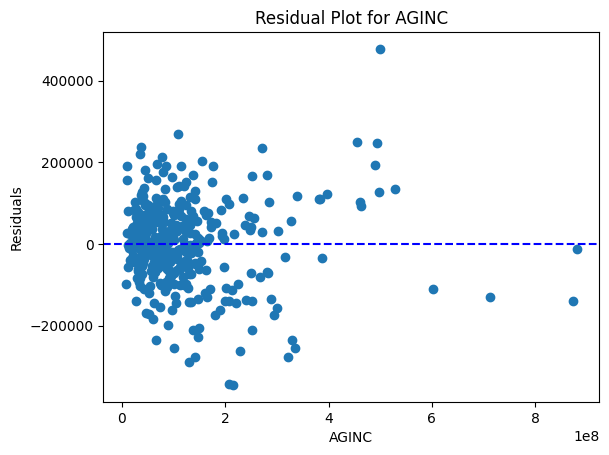

In [27]:
# Check residuals for each independent variable

# residual plot for AGINC (for example only - AGINC is not required to be in your model)
plt.scatter(train['AGINC'], your_result.resid)
plt.axhline(y=0, color='blue', linestyle='--')
plt.xlabel('AGINC')
plt.ylabel('Residuals')
plt.title('Residual Plot for AGINC')
plt.show()

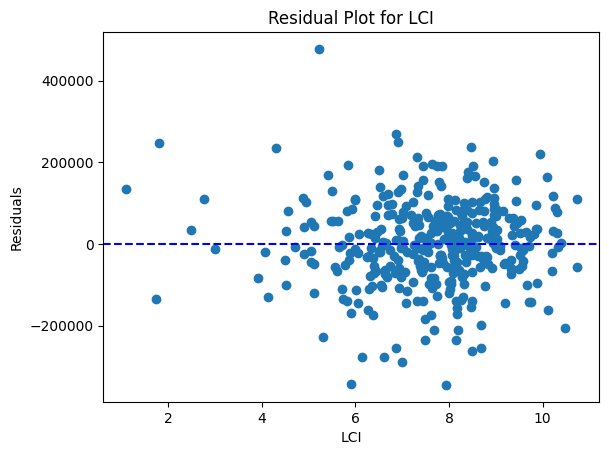

In [28]:
plt.scatter(train['LCI'], your_result.resid)
plt.axhline(y=0, color='blue', linestyle='--')
plt.xlabel('LCI')
plt.ylabel('Residuals')
plt.title('Residual Plot for LCI')
plt.show()

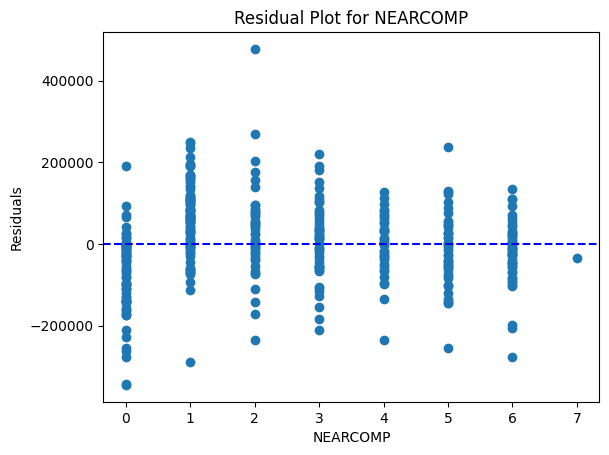

In [29]:
plt.scatter(train['NEARCOMP'], your_result.resid)
plt.axhline(y=0, color='blue', linestyle='--')
plt.xlabel('NEARCOMP')
plt.ylabel('Residuals')
plt.title('Residual Plot for NEARCOMP')
plt.show()

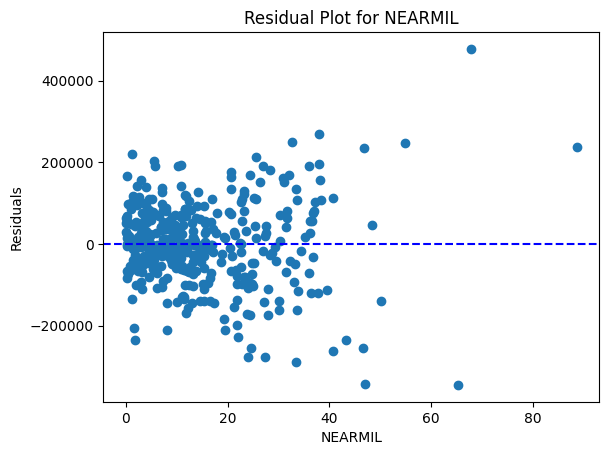

In [30]:
plt.scatter(train['NEARMIL'], your_result.resid)
plt.axhline(y=0, color='blue', linestyle='--')
plt.xlabel('NEARMIL')
plt.ylabel('Residuals')
plt.title('Residual Plot for NEARMIL')
plt.show()

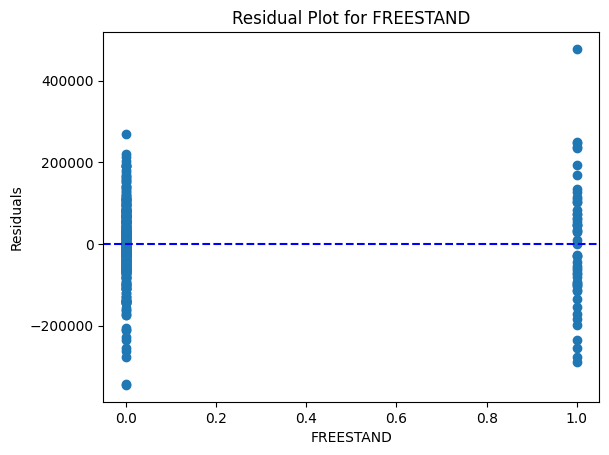

In [31]:
plt.scatter(train['FREESTAND'], your_result.resid)
plt.axhline(y=0, color='blue', linestyle='--')
plt.xlabel('FREESTAND')
plt.ylabel('Residuals')
plt.title('Residual Plot for FREESTAND')
plt.show()

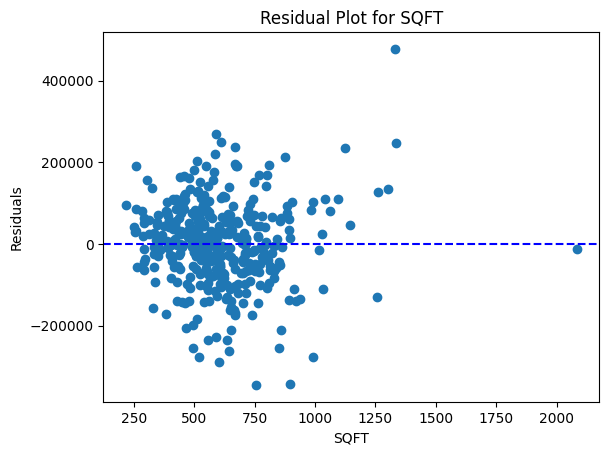

In [32]:
plt.scatter(train['SQFT'], your_result.resid)
plt.axhline(y=0, color='blue', linestyle='--')
plt.xlabel('SQFT')
plt.ylabel('Residuals')
plt.title('Residual Plot for SQFT')
plt.show()